In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [2]:
ds = pd.read_csv('diabetes.csv')
print(ds.head())
print(len(ds))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
768


In [3]:
ds.info() # output shown below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Split dataset
X=ds.iloc[:,0:8]
Y=ds.iloc[:,8]
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.3,random_state=0)

In [5]:
#The minimum number of samples required to split an internal node:default=2
#criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
dt=DecisionTreeClassifier(criterion="entropy",random_state=0,
                                  max_depth=3,min_samples_leaf=5)
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=0)

In [6]:
Y_pred= dt.predict(X_test)
Y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [7]:
Y_test

661    1
122    0
113    0
14     1
529    0
      ..
165    1
188    1
334    0
758    0
34     0
Name: Outcome, Length: 231, dtype: int64

In [8]:
cm=confusion_matrix(Y_test,Y_pred)
print(cm)
print(f1_score(Y_test,Y_pred))

[[145  12]
 [ 50  24]]
0.4363636363636364


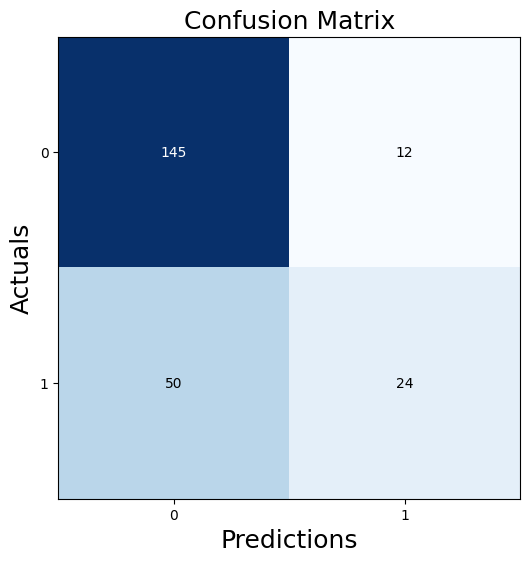

0.7316017316017316

In [9]:
#Visualizing confusion matrix for a better view,
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Blues)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
#Accuracy of our model
acc=accuracy_score(Y_test,Y_pred)
acc

In [10]:
import sklearn.metrics as metrics
print(metrics.classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82       157
           1       0.67      0.32      0.44        74

    accuracy                           0.73       231
   macro avg       0.71      0.62      0.63       231
weighted avg       0.72      0.73      0.70       231

